In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# **1. Import Libraries & Load Dataset**

In [2]:
dataset="/content/diabetes.csv"
df = pd.read_csv(dataset)
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **2. Dataset Description & Visualization**

In [3]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Visualize missing values**

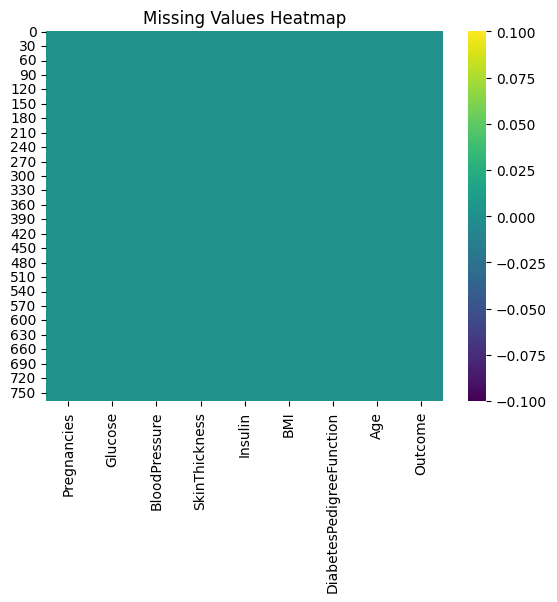

In [6]:
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## **Feature correlation**

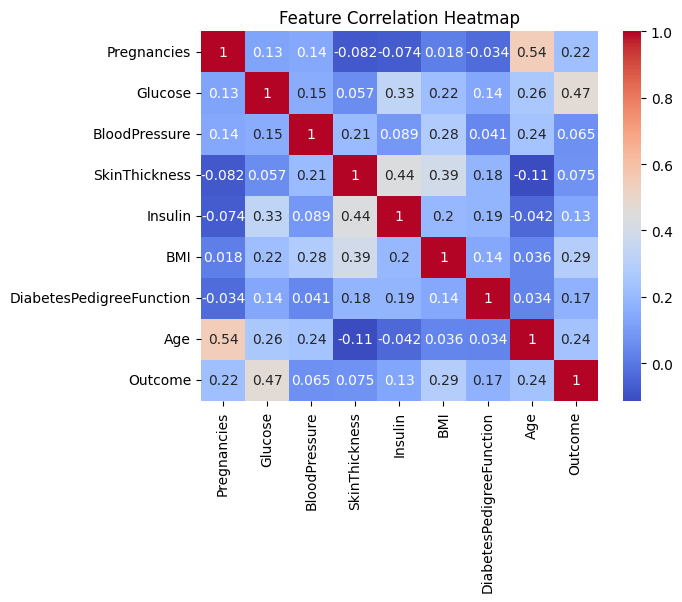

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


# **3. Splitting Data**

In [8]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **4. Model-1: Random Forest**

In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



## **Confusion matrix**

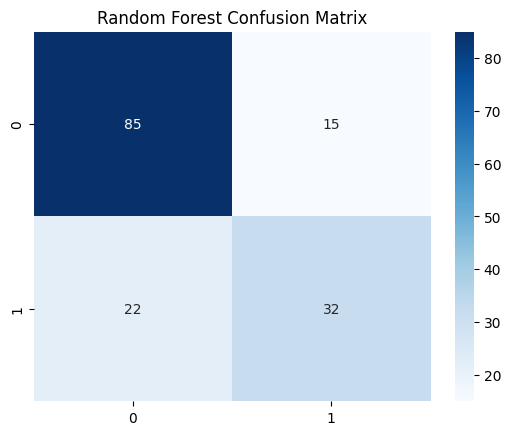

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

# **5.**  **Model-2 : Logistic Regression**

In [11]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))



Logistic Regression Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



## **Confusion matrix**

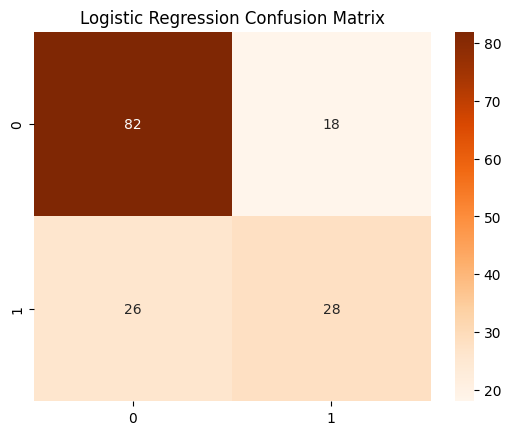

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap='Oranges', fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# **6. Model-3: Support Vector Machine**

In [13]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



## **Confusion matrix**

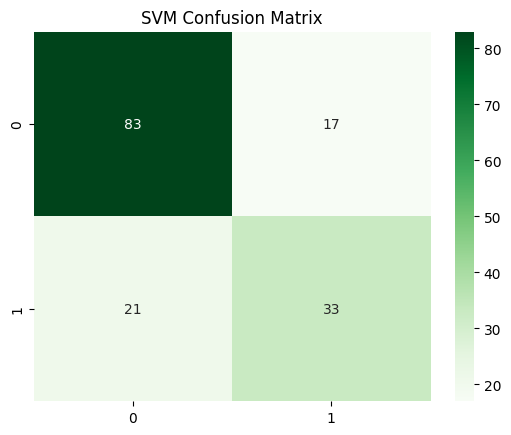

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='Greens', fmt='d')
plt.title('SVM Confusion Matrix')
plt.show()

KNN Accuracy: 0.7012987012987013
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



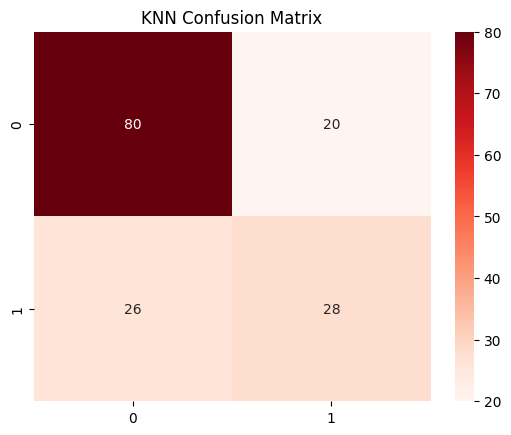

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap='Reds')
plt.title("KNN Confusion Matrix")
plt.show()


# **7. Model Comparison & Best Model Selection**

In [15]:
models = {"Random Forest": rf_model, "Logistic Regression": lr_model, "SVM": svm_model}
accuracies = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in models.items()}

best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
print(f'Best Model: {best_model_name} with Accuracy: {accuracies[best_model_name]:.2f}')


Best Model: Random Forest with Accuracy: 0.76


# **8. Save Best Model**

In [16]:
with open('DiabetesBestModel.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
print("Best model saved as 'DiabetesBestModel.pkl'")


Best model saved as 'DiabetesBestModel.pkl'


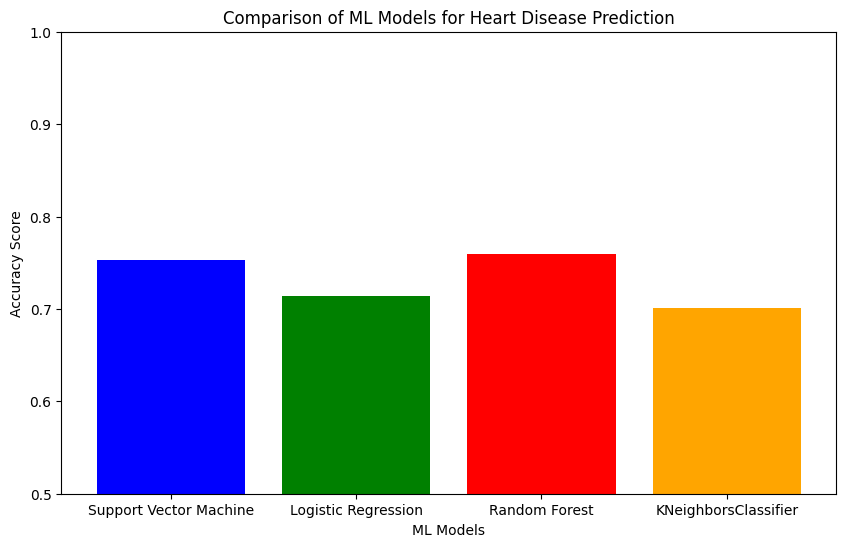

In [22]:
# Plot bar graph of model performance
models = {
          "Support Vector Machine": accuracy_score(y_test, y_pred_svm),
          "Logistic Regression": accuracy_score(y_test, y_pred_lr),
          "Random Forest": accuracy_score(y_test, y_pred_rf),
          "KNeighborsClassifier": accuracy_score(y_test, y_pred_knn),
          }

plt.figure(figsize=(10,6))
plt.bar(models.keys(), models.values(), color=['blue', 'green', 'red','orange'])
plt.xlabel("ML Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of ML Models for Heart Disease Prediction")
plt.ylim(0.5, 1.0)
plt.show()
